# <span style='color:dodgerblue; font-weight:bold;'><a name="2">1.1 Loading of Librariess</a></span>
### <span style='color:dodgerblue; font-weight:bold;'><a name="2">Load all the libraries to be used</a></span>


In [ ]:
import pandas as pd 
import numbers as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import re
import joblib

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectPercentile,chi2,f_classif
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

from sklearn.model_selection import train_test_split

## <span style='color:dodgerblue; font-weight:bold;'><a name="2">Real Estate Sales 2001-2021 Dataset Columns Description
</a></span>


In [ ]:

# Serial Number: A unique identifier assigned to each record or transaction.
# List Year: The year in which the property was listed or recorded in the dataset.
# Date Recorded: The date when the real estate sale was officially recorded.
# Town: The name of the town or city where the property is located.
# Address: The specific address of the property being sold.
# Assessed Value: The property value as determined by the tax assessor, typically for taxation purposes.
# Sale Amount: The actual amount for which the property was sold.
# Sales Ratio: The ratio between the assessed value and the sale amount.
# Property Type: The category of the property (e.g., residential, commercial, or industrial).
# Residential Type: A more specific classification of residential properties (e.g., single-family, multi-family, or condominium).
# Non Use Code: A code indicating reasons why the property may not be in use or exceptions affecting its usability.
# Assessor Remarks: Comments or notes added by the property tax assessor related to the property.
# OPM Remarks: Additional remarks or comments from the Office of Policy and Management (OPM).
# Location: Geographical information or coordinates for the property's location.



# <span style='color:dodgerblue; font-weight:bold;'><a name="2">1.2 Loading of Datasets</a></span>
### <span style='color:dodgerblue; font-weight:bold;'><a name="2"> Let us load the datasets</a></span>

In [ ]:
real_state=pd.read_csv("Real_Estate_Sales_2001-2021_GL.csv")


C:\Users\Heka\AppData\Local\Temp\ipykernel_18424\272975205.py:1: DtypeWarning: Columns (8,9,10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  real_state=pd.read_csv("Real_Estate_Sales_2001-2021_GL.csv")


In [ ]:
real_state

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
0,2020348,2020,09/13/2021,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.463000,Commercial,NaN,NaN,NaN,NaN,NaN
1,20002,2020,10/02/2020,Ashford,390 TURNPIKE RD,253000.0,430000.0,0.588300,Residential,Single Family,NaN,NaN,NaN,NaN
2,210317,2021,07/05/2022,Avon,53 COTSWOLD WAY,329730.0,805000.0,0.409600,Residential,Single Family,NaN,NaN,NaN,POINT (-72.846365959 41.781677018)
3,200212,2020,03/09/2021,Avon,5 CHESTNUT DRIVE,130400.0,179900.0,0.724800,Residential,Condo,NaN,NaN,NaN,NaN
4,200243,2020,04/13/2021,Avon,111 NORTHINGTON DRIVE,619290.0,890000.0,0.695800,Residential,Single Family,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1054154,190272,2019,06/24/2020,New London,4 BISHOP CT,60410.0,53100.0,1.137665,Single Family,Single Family,14 - Foreclosure,NaN,NaN,NaN
1054155,190284,2019,11/27/2019,Waterbury,126 PERKINS AVE,68280.0,76000.0,0.898400,Single Family,Single Family,25 - Other,PRIVATE SALE,NaN,NaN
1054156,190129,2019,04/27/2020,Windsor Locks,19 HATHAWAY ST,121450.0,210000.0,0.578300,Single Family,Single Family,NaN,NaN,NaN,NaN
1054157,190504,2019,06/03/2020,Middletown,8 BYSTREK DR,203360.0,280000.0,0.726300,Single Family,Single Family,NaN,NaN,NaN,NaN


# <span style='color:dodgerblue; font-weight:bold;'><a name="2">2 - Exploratory Data Analysis</a></span>
### <span style='color:aqua; font-weight:bold;'><a name="2.1">2.1 - Exploration of Data</a></span>

In [ ]:
def show(df):

    print("TOP 5 RECORDS")
    display(df.head())
    

    print("\n Columns")
    display(df.columns)
    print("\n INFO")
    display(df.info())
    

    print("\n Describe")
    display(df.describe())
    
    
    print("\n Missing Values")
    display(df.isnull().sum())
    

    print("\n Shape Of Data")
    display(df.shape)
    


    print("============================================================================ \n")

In [ ]:
print("===============================real_state===================================")

show(real_state)

===============================real_state===================================
TOP 5 RECORDS


,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
0,2020348,2020,09/13/2021,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.4630,Commercial,NaN,NaN,NaN,NaN,NaN
1,20002,2020,10/02/2020,Ashford,390 TURNPIKE RD,253000.0,430000.0,0.5883,Residential,Single Family,NaN,NaN,NaN,NaN
2,210317,2021,07/05/2022,Avon,53 COTSWOLD WAY,329730.0,805000.0,0.4096,Residential,Single Family,NaN,NaN,NaN,POINT (-72.846365959 41.781677018)
3,200212,2020,03/09/2021,Avon,5 CHESTNUT DRIVE,130400.0,179900.0,0.7248,Residential,Condo,NaN,NaN,NaN,NaN
4,200243,2020,04/13/2021,Avon,111 NORTHINGTON DRIVE,619290.0,890000.0,0.6958,Residential,Single Family,NaN,NaN,NaN,NaN



 Columns


Index(['Serial Number', 'List Year', 'Date Recorded', 'Town', 'Address',
       'Assessed Value', 'Sale Amount', 'Sales Ratio', 'Property Type',
       'Residential Type', 'Non Use Code', 'Assessor Remarks', 'OPM remarks',
       'Location'],
      dtype='object')


 INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054159 entries, 0 to 1054158
Data columns (total 14 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Serial Number     1054159 non-null  int64  
 1   List Year         1054159 non-null  int64  
 2   Date Recorded     1054157 non-null  object 
 3   Town              1054159 non-null  object 
 4   Address           1054108 non-null  object 
 5   Assessed Value    1054159 non-null  float64
 6   Sale Amount       1054159 non-null  float64
 7   Sales Ratio       1054159 non-null  float64
 8   Property Type     671713 non-null   object 
 9   Residential Type  660275 non-null   object 
 10  Non Use Code      302242 non-null   object 
 11  Assessor Remarks  161472 non-null   object 
 12  OPM remarks       11564 non-null    object 
 13  Location          254643 non-null   object 
dtypes: float64(3), int64(2), object(9)
memory usage: 112.6+ MB


None


 Describe


,Serial Number,List Year,Assessed Value,Sale Amount,Sales Ratio
count,1.054159e+06,1.054159e+06,1.054159e+06,1.054159e+06,1.054159e+06
mean,5.027140e+05,2.010774e+03,2.797416e+05,3.990286e+05,9.953241e+00
std,7.230239e+06,6.540711e+00,1.650117e+06,5.229758e+06,1.838434e+03
min,0.000000e+00,2.001000e+03,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.055200e+04,2.004000e+03,8.845000e+04,1.422000e+05,4.816008e-01
50%,8.008000e+04,2.011000e+03,1.395800e+05,2.300000e+05,6.162887e-01
75%,1.608155e+05,2.017000e+03,2.270000e+05,3.700000e+05,7.764000e-01
max,2.000500e+09,2.021000e+03,8.815100e+08,5.000000e+09,1.226420e+06



 Missing Values


Serial Number             0
List Year                 0
Date Recorded             2
Town                      0
Address                  51
Assessed Value            0
Sale Amount               0
Sales Ratio               0
Property Type        382446
Residential Type     393884
Non Use Code         751917
Assessor Remarks     892687
OPM remarks         1042595
Location             799516
dtype: int64


 Shape Of Data


(1054159, 14)

In [ ]:
real_state['Property Type'].value_counts()

Property Type
Single Family     401612
Residential       112099
Condo             105420
Two Family         26408
Three Family       12586
Vacant Land         5746
Commercial          4208
Four Family         2150
Apartments           943
Industrial           533
Public Utility         8
Name: count, dtype: int64

In [ ]:
real_state['Residential Type'].value_counts()

Residential Type
Single Family    480566
Condo            128789
Two Family        32615
Three Family      15542
Four Family        2763
Name: count, dtype: int64

# <span style='color:aqua; font-weight:bold;'><a name="2.2"> Data Preprocessing</a></span>

### <span style='color:aqua; font-weight:bold;'><a name="2.2"> 1-Handling Missing Values</a></span>
### <span style='color:aqua; font-weight:bold;'><a name="2.2">2-Data Cleaning ( check outliers and duplicates)</a></span>
### <span style='color:aqua; font-weight:bold;'><a name="2.2">3-Feature Engineering</a></span>
### <span style='color:aqua; font-weight:bold;'><a name="2.2">4-Encoding Categorical Variables </a></span>
### <span style='color:aqua; font-weight:bold;'><a name="2.2">5-Feature Selection </a></span>


## <span style='color:dodgerblue; font-weight:bold;'><a name="4.2">1) Handle Missing Values</a></span>
### <span style='color:dodgerblue; font-weight:bold;'><a name="4">Drop some Features</a></span>

In [ ]:
real_state = real_state.drop(columns=["Non Use Code","Assessor Remarks","OPM remarks","Location"])

In [ ]:
real_state = real_state.dropna(subset=['Property Type'])


In [ ]:
# Define a function that fills the 'Residential Type' column based on certain conditions
def fill_residential_type(row):
    # If the value in the 'Property Type' column is 'Industrial'
    if row['Property Type'] == 'Industrial':
        return 'Industrial Property'  # Assign 'Industrial Property'
    # If the value in the 'Property Type' column is 'Commercial'
    elif row['Property Type'] == 'Commercial':
        return 'Commercial Property'  # Assign 'Commercial Property'
    # If the value in the 'Residential Type' column is missing (NaN)
    elif pd.isna(row['Residential Type']):
        return 'Single Family'  # Assign a default value 'Single Family'
    # If there is already a value in the 'Residential Type' column
    else:
        return row['Residential Type']  # Keep the original value as is

# Apply the function to each row in the DataFrame 'real_state' using the apply method
real_state['Residential Type'] = real_state.apply(fill_residential_type, axis=1)

# Print the count of each value in the 'Residential Type' column after modification
print(real_state['Residential Type'].value_counts())


Residential Type
Single Family          487263
Condo                  128789
Two Family              32615
Three Family            15542
Commercial Property      4208
Four Family              2763
Industrial Property       533
Name: count, dtype: int64


In [ ]:
real_state=real_state.dropna()

In [ ]:
real_state

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type
0,2020348,2020,09/13/2021,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.463000,Commercial,Commercial Property
1,20002,2020,10/02/2020,Ashford,390 TURNPIKE RD,253000.0,430000.0,0.588300,Residential,Single Family
2,210317,2021,07/05/2022,Avon,53 COTSWOLD WAY,329730.0,805000.0,0.409600,Residential,Single Family
3,200212,2020,03/09/2021,Avon,5 CHESTNUT DRIVE,130400.0,179900.0,0.724800,Residential,Condo
4,200243,2020,04/13/2021,Avon,111 NORTHINGTON DRIVE,619290.0,890000.0,0.695800,Residential,Single Family
...,...,...,...,...,...,...,...,...,...,...
1054153,190272,2019,08/03/2020,Wilton,145 WHIPSTICK RD,681870.0,1134708.0,0.600900,Single Family,Single Family
1054154,190272,2019,06/24/2020,New London,4 BISHOP CT,60410.0,53100.0,1.137665,Single Family,Single Family
1054155,190284,2019,11/27/2019,Waterbury,126 PERKINS AVE,68280.0,76000.0,0.898400,Single Family,Single Family
1054156,190129,2019,04/27/2020,Windsor Locks,19 HATHAWAY ST,121450.0,210000.0,0.578300,Single Family,Single Family


In [ ]:
real_state['Property Type'].value_counts()

Property Type
Single Family     401610
Residential       112099
Condo             105419
Two Family         26407
Three Family       12586
Vacant Land         5746
Commercial          4208
Four Family         2150
Apartments           943
Industrial           533
Public Utility         8
Name: count, dtype: int64

In [ ]:
# Define a list of required property types
required_values = ['Industrial', 'Commercial', 'Residential', 'Vacant Land']

# Update the 'Property Type' column by keeping only values in the 'required_values' list
real_state['Property Type'] = real_state['Property Type'].apply(
    lambda x: x if x in required_values else None  # Retain value if it's in the list, otherwise set it to None
)

# Drop rows where the 'Property Type' column contains NaN values (None values after the previous step)
real_state = real_state.dropna()  # Remove rows with missing 'Property Type' values


In [ ]:
real_state

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type
0,2020348,2020,09/13/2021,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.4630,Commercial,Commercial Property
1,20002,2020,10/02/2020,Ashford,390 TURNPIKE RD,253000.0,430000.0,0.5883,Residential,Single Family
2,210317,2021,07/05/2022,Avon,53 COTSWOLD WAY,329730.0,805000.0,0.4096,Residential,Single Family
3,200212,2020,03/09/2021,Avon,5 CHESTNUT DRIVE,130400.0,179900.0,0.7248,Residential,Condo
4,200243,2020,04/13/2021,Avon,111 NORTHINGTON DRIVE,619290.0,890000.0,0.6958,Residential,Single Family
...,...,...,...,...,...,...,...,...,...,...
123894,21073,2021,11/16/2021,Watertown,50 SUMMIT RIDGE,263100.0,430000.0,0.6118,Residential,Single Family
123895,210900013,2021,09/20/2022,Woodbury,89 TAMARACK LANR UNIT 89A,79810.0,200000.0,0.3990,Residential,Condo
123896,210500004,2021,05/06/2022,Woodbury,69 BACON POND ROAD,79590.0,360000.0,0.2210,Vacant Land,Single Family
123897,211130,2021,06/29/2022,West Haven,114 TUTHILL ST,117600.0,275000.0,0.4276,Residential,Single Family


In [ ]:
real_state['Property Type'].value_counts()

Property Type
Residential    112099
Vacant Land      5746
Commercial       4208
Industrial        533
Name: count, dtype: int64

## <span style='color:dodgerblue; font-weight:bold;'><a name="4">2- Data Cleaning</a></span>


### <span style='color:dodgerblue; font-weight:bold;'><a name="4">2.1 Check Duplicates</a></span>

In [ ]:
def check_duplicates(dataframes):
        duplicates = dataframes[dataframes.duplicated()]
        print("\nChecking duplicates in  dataset:")
        if duplicates.empty:
            print("No duplicates found.")
        else:
            print(f"Number of duplicate rows: {duplicates.shape[0]}")
            print(duplicates)
        print("*" * 40)

In [ ]:
check_duplicates(real_state)


Checking duplicates in  dataset:
No duplicates found.
****************************************


### <span style='color:dodgerblue; font-weight:bold;'><a name="4">2.2 Outlier Function with (I Q R _ stander deviation)</a></span>

In [ ]:
numerical_columns = real_state.select_dtypes(include=['number']).columns
print("Numerical Columns:", numerical_columns)

categorical_columns = real_state.select_dtypes(include=['object', 'category']).columns
print("Categorical Columns:", categorical_columns)

Numerical Columns: Index(['Serial Number', 'List Year', 'Assessed Value', 'Sale Amount',
       'Sales Ratio'],
      dtype='object')
Categorical Columns: Index(['Date Recorded', 'Town', 'Address', 'Property Type',
       'Residential Type'],
      dtype='object')


In [ ]:
for col in numerical_columns:
    Q1 = real_state[col].quantile(0.25)
    Q3 = real_state[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    if any(real_state[col] < lower_bound) or any(real_state[col] > upper_bound):
        print(f'Outliers detected in {col}')
    else:
        print(f'No outliers in {col}')

Outliers detected in Serial Number
No outliers in List Year
Outliers detected in Assessed Value
Outliers detected in Sale Amount
Outliers detected in Sales Ratio


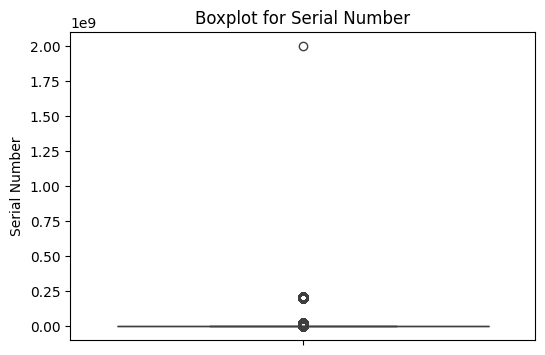

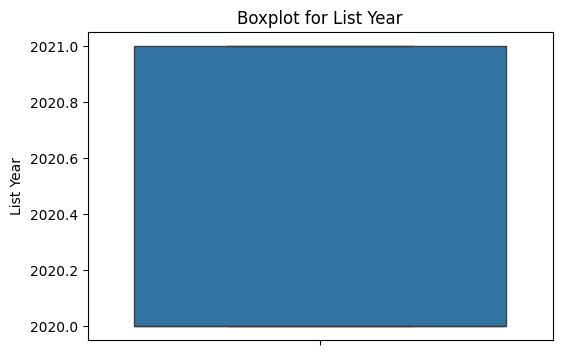

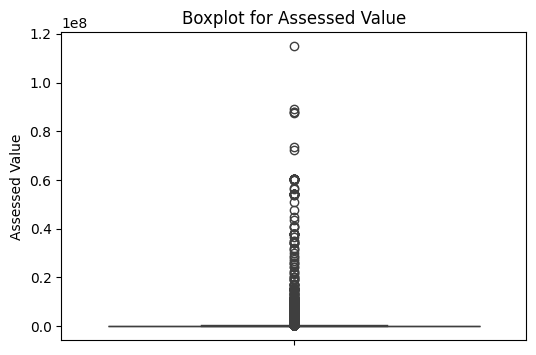

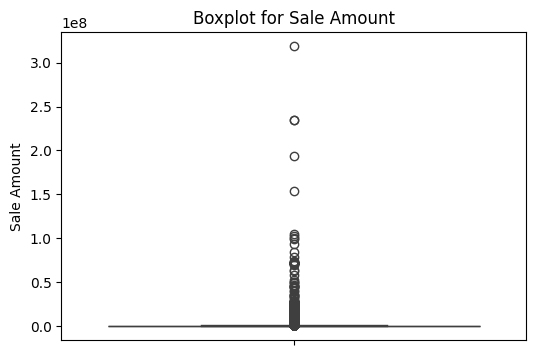

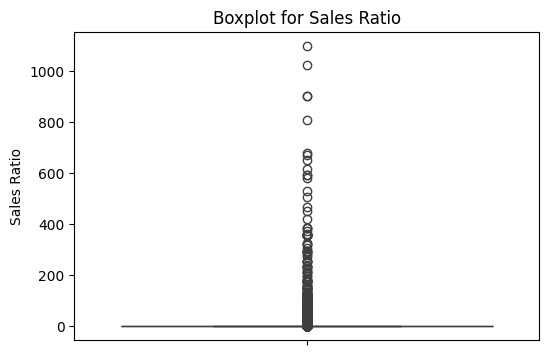

In [ ]:
for col in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=real_state[col])
    plt.title(f'Boxplot for {col}')
    plt.show()

In [ ]:
import numpy as np

for col in numerical_columns:
    # Calculate the IQR for the column
    Q1 = real_state[col].quantile(0.25)
    Q3 = real_state[col].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define the outlier bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Cap the outliers at the upper and lower bounds
    real_state[col] = np.where(
        real_state[col] > upper_bound, upper_bound,
        np.where(real_state[col] < lower_bound, lower_bound, real_state[col])
    )

C:\Users\Heka\AppData\Local\Temp\ipykernel_18424\2898520797.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_state[col] = np.where(
C:\Users\Heka\AppData\Local\Temp\ipykernel_18424\2898520797.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_state[col] = np.where(
C:\Users\Heka\AppData\Local\Temp\ipykernel_18424\2898520797.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

In [ ]:
for col in numerical_columns:
    Q1 = real_state[col].quantile(0.25)
    Q3 = real_state[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    if any(real_state[col] < lower_bound) or any(real_state[col] > upper_bound):
        print(f'Outliers detected in {col}')
    else:
        print(f'No outliers in {col}')

No outliers in Serial Number
No outliers in List Year
No outliers in Assessed Value
No outliers in Sale Amount
No outliers in Sales Ratio


In [ ]:
real_state

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type
0,226538.5,2020.0,09/13/2021,Ansonia,230 WAKELEE AVE,150500.00,325000.0,0.4630,Commercial,Commercial Property
1,184286.5,2020.0,10/02/2020,Ashford,390 TURNPIKE RD,253000.00,430000.0,0.5883,Residential,Single Family
2,210317.0,2021.0,07/05/2022,Avon,53 COTSWOLD WAY,329730.00,805000.0,0.4096,Residential,Single Family
3,200212.0,2020.0,03/09/2021,Avon,5 CHESTNUT DRIVE,130400.00,179900.0,0.7248,Residential,Condo
4,200243.0,2020.0,04/13/2021,Avon,111 NORTHINGTON DRIVE,480093.75,880000.0,0.6958,Residential,Single Family
...,...,...,...,...,...,...,...,...,...,...
123894,184286.5,2021.0,11/16/2021,Watertown,50 SUMMIT RIDGE,263100.00,430000.0,0.6118,Residential,Single Family
123895,226538.5,2021.0,09/20/2022,Woodbury,89 TAMARACK LANR UNIT 89A,79810.00,200000.0,0.3990,Residential,Condo
123896,226538.5,2021.0,05/06/2022,Woodbury,69 BACON POND ROAD,79590.00,360000.0,0.2210,Vacant Land,Single Family
123897,211130.0,2021.0,06/29/2022,West Haven,114 TUTHILL ST,117600.00,275000.0,0.4276,Residential,Single Family


## <span style='color:dodgerblue; font-weight:bold;'><a name="4">3- Feature Engineering</a></span>

In [ ]:
real_state['Day of Week'] = pd.to_datetime(real_state['Date Recorded']).dt.dayofweek


C:\Users\Heka\AppData\Local\Temp\ipykernel_18424\2872421075.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_state['Day of Week'] = pd.to_datetime(real_state['Date Recorded']).dt.dayofweek


In [ ]:
real_state['Year of Sale'] = pd.to_datetime(real_state['Date Recorded']).dt.year
real_state['Month of Sale'] = pd.to_datetime(real_state['Date Recorded']).dt.month
real_state['Is Weekend'] = real_state['Day of Week'].isin([5, 6]).astype(int)

C:\Users\Heka\AppData\Local\Temp\ipykernel_18424\4172938872.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_state['Year of Sale'] = pd.to_datetime(real_state['Date Recorded']).dt.year
C:\Users\Heka\AppData\Local\Temp\ipykernel_18424\4172938872.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_state['Month of Sale'] = pd.to_datetime(real_state['Date Recorded']).dt.month
C:\Users\Heka\AppData\Local\Temp\ipykernel_18424\4172938872.py:3: SettingWithCopyWarning: 
A value is trying to be set on a 

In [ ]:
# Define a list of required property types
required_values = ['Industrial', 'Commercial', 'Residential', 'Vacant Land']

# Update the 'Property Type' column by keeping only values in the 'required_values' list
real_state['Property Type'] = real_state['Property Type'].apply(
    lambda x: x if x in required_values else None  # Retain value if it's in the list, otherwise set it to None
)

# Drop rows where the 'Property Type' column contains NaN values (None values after the previous step)
real_state = real_state.dropna()  # Remove rows with missing 'Property Type' values


C:\Users\Heka\AppData\Local\Temp\ipykernel_18424\272316033.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_state['Property Type'] = real_state['Property Type'].apply(


In [ ]:
# Calculate the price difference by subtracting 'Assessed Value' from 'Sale Amount'
real_state['Price Difference'] = real_state['Sale Amount'] - real_state['Assessed Value']

# Create a new column 'Premium Indicator' to indicate whether the 'Sale Amount' is higher than the 'Assessed Value'
real_state['Premium Indicator'] = (real_state['Price Difference'] > 0).astype(int)


In [ ]:
# Create a new column 'Sales Ratio Category' by categorizing the 'Sales Ratio' into different bins
real_state['Sales Ratio Category'] = pd.cut(
    real_state['Sales Ratio'], bins=[0, 0.5, 1.0, 1.5, float('inf')], 
    labels=['Low', 'Medium', 'High', 'Very High']
)

In [ ]:
real_state.info()

<class 'pandas.core.frame.DataFrame'>
Index: 122586 entries, 0 to 123898
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   Serial Number         122586 non-null  float64 
 1   List Year             122586 non-null  float64 
 2   Date Recorded         122586 non-null  object  
 3   Town                  122586 non-null  object  
 4   Address               122586 non-null  object  
 5   Assessed Value        122586 non-null  float64 
 6   Sale Amount           122586 non-null  float64 
 7   Sales Ratio           122586 non-null  float64 
 8   Property Type         122586 non-null  object  
 9   Residential Type      122586 non-null  object  
 10  Day of Week           122586 non-null  int32   
 11  Year of Sale          122586 non-null  int32   
 12  Month of Sale         122586 non-null  int32   
 13  Is Weekend            122586 non-null  int32   
 14  Price Difference      122586 non-null  fl

## <span style='color:dodgerblue; font-weight:bold;'><a name="4">Data Visualization</a></span>

C:\Users\Heka\AppData\Local\Temp\ipykernel_18424\2654267455.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=real_state, x='Property Type', palette='viridis')


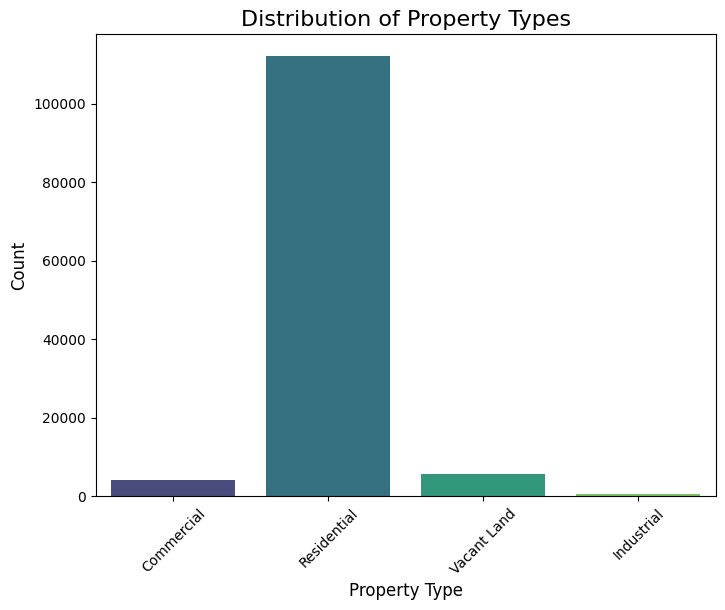

In [ ]:
# Create a figure with size 8x6 inches for the plot
plt.figure(figsize=(8, 6))

# Use Seaborn's countplot to visualize the distribution of 'Property Type'
# The 'palette' argument defines the color scheme, in this case 'viridis'
sns.countplot(data=real_state, x='Property Type', palette='viridis')

# Set the title of the plot with font size 16
plt.title('Distribution of Property Types', fontsize=16)

# Set the label for the x-axis with font size 12
plt.xlabel('Property Type', fontsize=12)

# Set the label for the y-axis with font size 12
plt.ylabel('Count', fontsize=12)

# Rotate the x-axis labels by 45 degrees for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()


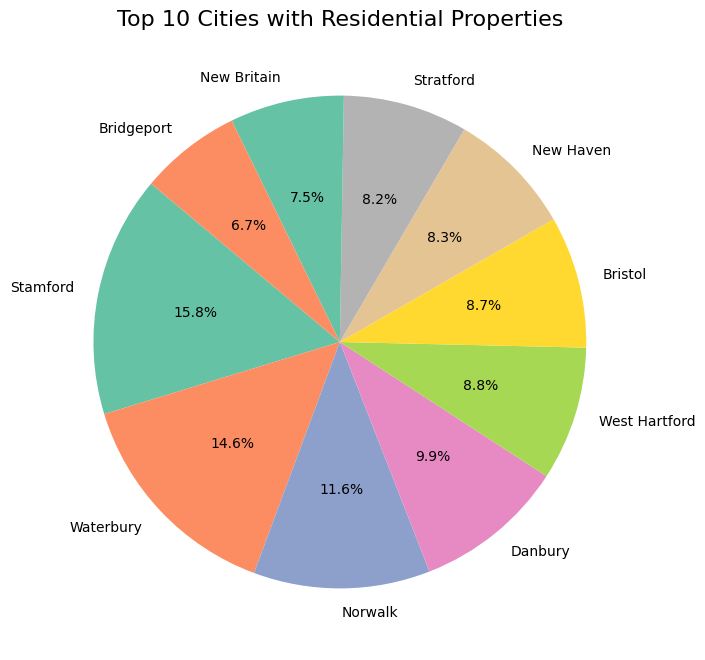

In [ ]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the 'real_state' DataFrame to include only residential properties
residential_data = real_state[real_state['Property Type'] == 'Residential']

# Get the top 10 cities with the most residential properties
top_cities = residential_data['Town'].value_counts().head(10)

# Define a color palette with 10 colors using Seaborn's 'Set2' palette (you can try 'pastel' or 'deep' as alternatives)
colors = sns.color_palette('Set2', n_colors=10)

# Create a pie chart to show the distribution of the top 10 cities
plt.figure(figsize=(10, 8))  # Set the figure size
plt.pie(top_cities.values, 
        labels=top_cities.index,  # Labels for each city
        autopct='%1.1f%%',  # Display percentage with 1 decimal place
        startangle=140,  # Start the pie chart from a rotated angle
        colors=colors)  # Apply the defined color palette

# Set the title of the chart
plt.title('Top 10 Cities with Residential Properties', fontsize=16)

# Display the pie chart
plt.show()


C:\Users\Heka\AppData\Local\Temp\ipykernel_18424\3253327033.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cities_sales.index, y=top_cities_sales.values, palette='mako')  # Use the 'mako' color palette


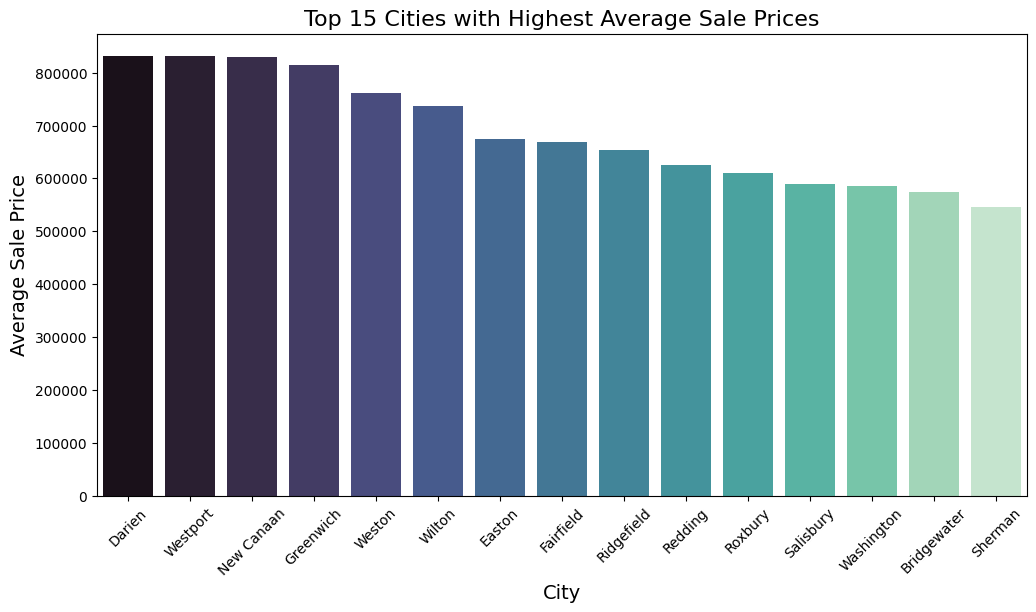

In [ ]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the average sale price for each city by grouping the data by 'Town' and calculating the mean of 'Sale Amount'
top_cities_sales = real_state.groupby('Town')['Sale Amount'].mean().sort_values(ascending=False).head(15)  # Selecting top 15 cities

# Create a bar plot to visualize the top 15 cities with the highest average sale prices
plt.figure(figsize=(12, 6))  # Set the figure size
sns.barplot(x=top_cities_sales.index, y=top_cities_sales.values, palette='mako')  # Use the 'mako' color palette

# Add titles and labels to the plot
plt.title('Top 15 Cities with Highest Average Sale Prices', fontsize=16)  # Title of the plot
plt.xlabel('City', fontsize=14)  # Label for the x-axis
plt.ylabel('Average Sale Price', fontsize=14)  # Label for the y-axis

# Rotate city names on the x-axis for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()


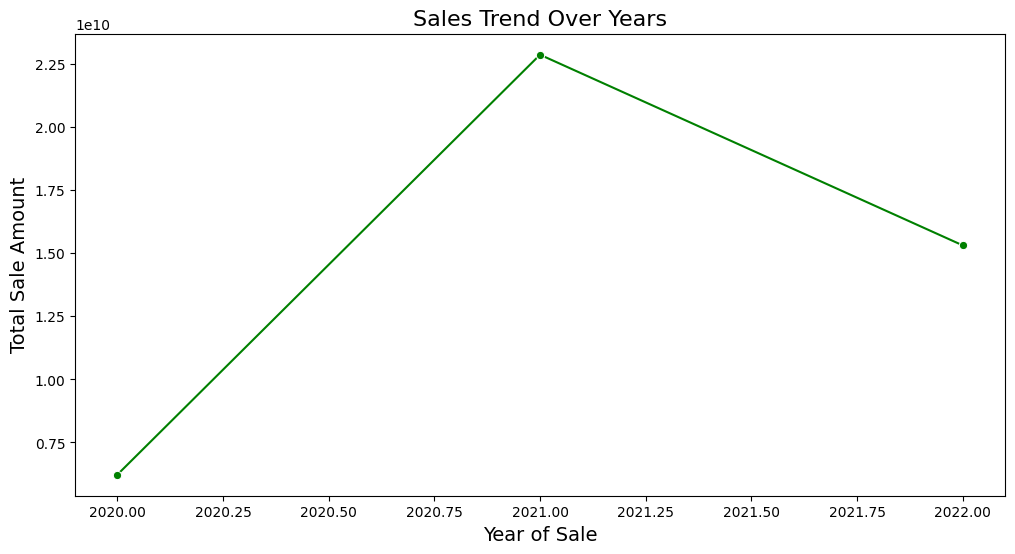

In [ ]:
sales_trend = real_state.groupby('Year of Sale')['Sale Amount'].sum()

plt.figure(figsize=(12, 6))
sns.lineplot(x=sales_trend.index, y=sales_trend.values, marker='o', color='green')
plt.title('Sales Trend Over Years', fontsize=16)
plt.xlabel('Year of Sale', fontsize=14)
plt.ylabel('Total Sale Amount', fontsize=14)
plt.show()

C:\Users\Heka\AppData\Local\Temp\ipykernel_18424\1097570191.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_sale_amount.index, y=average_sale_amount.values, palette='Set2')  # Use 'Set2' color palette


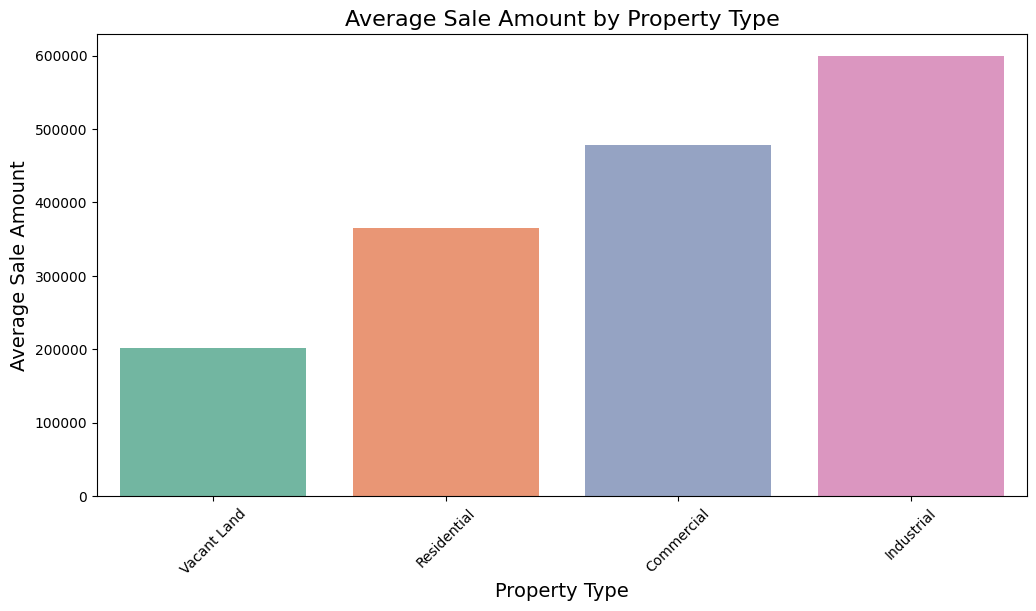

In [ ]:
# Calculate the average sale amount for each property type by grouping the data by 'Property Type' 
# and calculating the mean of 'Sale Amount'. Then, sort the values.
average_sale_amount = real_state.groupby('Property Type')['Sale Amount'].mean().sort_values()

# Create a bar plot to visualize the average sale amount by property type
plt.figure(figsize=(12, 6))  # Set the figure size
sns.barplot(x=average_sale_amount.index, y=average_sale_amount.values, palette='Set2')  # Use 'Set2' color palette

# Add titles and labels to the plot
plt.title('Average Sale Amount by Property Type', fontsize=16)  # Title of the plot
plt.xlabel('Property Type', fontsize=14)  # Label for the x-axis (Property Type)
plt.ylabel('Average Sale Amount', fontsize=14)  # Label for the y-axis (Average Sale Amount)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()


In [ ]:
real_state

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Day of Week,Year of Sale,Month of Sale,Is Weekend,Price Difference,Premium Indicator,Sales Ratio Category
0,226538.5,2020.0,09/13/2021,Ansonia,230 WAKELEE AVE,150500.00,325000.0,0.4630,Commercial,Commercial Property,0,2021,9,0,174500.00,1,Low
1,184286.5,2020.0,10/02/2020,Ashford,390 TURNPIKE RD,253000.00,430000.0,0.5883,Residential,Single Family,4,2020,10,0,177000.00,1,Medium
2,210317.0,2021.0,07/05/2022,Avon,53 COTSWOLD WAY,329730.00,805000.0,0.4096,Residential,Single Family,1,2022,7,0,475270.00,1,Low
3,200212.0,2020.0,03/09/2021,Avon,5 CHESTNUT DRIVE,130400.00,179900.0,0.7248,Residential,Condo,1,2021,3,0,49500.00,1,Medium
4,200243.0,2020.0,04/13/2021,Avon,111 NORTHINGTON DRIVE,480093.75,880000.0,0.6958,Residential,Single Family,1,2021,4,0,399906.25,1,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123894,184286.5,2021.0,11/16/2021,Watertown,50 SUMMIT RIDGE,263100.00,430000.0,0.6118,Residential,Single Family,1,2021,11,0,166900.00,1,Medium
123895,226538.5,2021.0,09/20/2022,Woodbury,89 TAMARACK LANR UNIT 89A,79810.00,200000.0,0.3990,Residential,Condo,1,2022,9,0,120190.00,1,Low
123896,226538.5,2021.0,05/06/2022,Woodbury,69 BACON POND ROAD,79590.00,360000.0,0.2210,Vacant Land,Single Family,4,2022,5,0,280410.00,1,Low
123897,211130.0,2021.0,06/29/2022,West Haven,114 TUTHILL ST,117600.00,275000.0,0.4276,Residential,Single Family,2,2022,6,0,157400.00,1,Low


In [ ]:
real_state.columns

Index(['Serial Number', 'List Year', 'Date Recorded', 'Town', 'Address',
       'Assessed Value', 'Sale Amount', 'Sales Ratio', 'Property Type',
       'Residential Type', 'Day of Week', 'Year of Sale', 'Month of Sale',
       'Is Weekend', 'Price Difference', 'Premium Indicator',
       'Sales Ratio Category'],
      dtype='object')

## <span style='color:dodgerblue; font-weight:bold;'><a name="4">Scaling</a></span>

In [ ]:
# Import necessary libraries
from sklearn.preprocessing import StandardScaler
import os

# Select the numeric columns (columns of type float64 or int64)
numeric_columns = real_state.select_dtypes(include=['float64', 'int64']).columns

# Initialize the StandardScaler to standardize the data
scaler = StandardScaler()

# Apply the scaler to the numeric columns and update the DataFrame with scaled values
real_state[numeric_columns] = scaler.fit_transform(real_state[numeric_columns])

# Display the first few rows of the scaled data
real_state.head()

# Save the scaler object to a file for future use (so the same scaling can be applied to new data)
joblib.dump(scaler, os.path.join('scaler.pkl'))


['scaler.pkl']

## <span style='color:dodgerblue; font-weight:bold;'><a name="4">4- Data Encoder</a></span>

In [ ]:
real_state_encoder={
    'Date_Recorded_encoder':real_state['Date Recorded'],
    'Town_encoder':real_state['Town'],
    'Address_encoder':real_state['Address'],
    'Property_Type_encoder':real_state['Property Type'],
    'Residential_Type_encoder':real_state['Residential Type'],
    'Sales Ratio Category':real_state['Sales Ratio Category']

}

In [ ]:
# Import the LabelEncoder class from sklearn
from sklearn.preprocessing import LabelEncoder
import joblib

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Loop through the 'real_state_encoder' dictionary and apply LabelEncoder to each column's values
for name, value in real_state_encoder.items():
    # Apply the LabelEncoder to the specified column and update the DataFrame with encoded values
    real_state[name] = label_encoder.fit_transform(value)

# Save the fitted label encoder object to a file for future use
joblib.dump(label_encoder, os.path.join('encoder.pkl'))


['encoder.pkl']

In [ ]:
real_state['Property_Type_encoder'].value_counts()

Property_Type_encoder
2    112099
3      5746
0      4208
1       533
Name: count, dtype: int64

In [ ]:
real_state.head()

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,...,Month of Sale,Is Weekend,Price Difference,Premium Indicator,Sales Ratio Category,Date_Recorded_encoder,Town_encoder,Address_encoder,Property_Type_encoder,Residential_Type_encoder
0,1.688949,-0.924421,09/13/2021,Ansonia,230 WAKELEE AVE,-0.350907,-0.158276,-0.590746,Commercial,Commercial Property,...,9,0,0.061350,1,0,405,1,43815,0,0
1,-1.629845,-0.924421,10/02/2020,Ashford,390 TURNPIKE RD,0.438811,0.288601,0.223872,Residential,Single Family,...,10,0,0.079705,1,1,439,2,68702,2,4
2,0.414789,1.081759,07/05/2022,Avon,53 COTSWOLD WAY,1.029982,1.884589,-0.937918,Residential,Single Family,...,7,0,2.269573,1,0,294,3,84123,2,4
3,-0.378935,-0.924421,03/09/2021,Avon,5 CHESTNUT DRIVE,-0.505769,-0.775817,1.111306,Residential,Condo,...,3,0,-0.856387,1,1,105,3,80085,2,1
4,-0.376500,-0.924421,04/13/2021,Avon,111 NORTHINGTON DRIVE,2.188470,2.203787,0.922767,Residential,Single Family,...,4,0,1.716260,1,1,159,3,8748,2,4


## <span style='color:dodgerblue; font-weight:bold;'><a name="4">Feature Selection</a></span>

In [ ]:
real_state.columns

Index(['Serial Number', 'List Year', 'Date Recorded', 'Town', 'Address',
       'Assessed Value', 'Sale Amount', 'Sales Ratio', 'Property Type',
       'Residential Type', 'Day of Week', 'Year of Sale', 'Month of Sale',
       'Is Weekend', 'Price Difference', 'Premium Indicator',
       'Sales Ratio Category', 'Date_Recorded_encoder', 'Town_encoder',
       'Address_encoder', 'Property_Type_encoder', 'Residential_Type_encoder'],
      dtype='object')

In [ ]:
real_state=real_state[['Serial Number', 'List Year',  'Assessed Value', 'Sale Amount', 'Sales Ratio', 'Day of Week', 'Year of Sale', 'Month of Sale',
       'Is Weekend', 'Price Difference', 'Premium Indicator','Sales Ratio Category', 'Date_Recorded_encoder', 'Town_encoder',
       'Address_encoder', 'Property_Type_encoder', 'Residential_Type_encoder']]

In [ ]:
real_state.corr()['Property_Type_encoder']

Serial Number              -0.025560
List Year                  -0.026436
Assessed Value             -0.255937
Sale Amount                -0.162828
Sales Ratio                -0.091285
Day of Week                -0.008753
Year of Sale               -0.019349
Month of Sale              -0.003084
Is Weekend                  0.005392
Price Difference           -0.037002
Premium Indicator           0.033035
Sales Ratio Category       -0.043533
Date_Recorded_encoder      -0.003004
Town_encoder                0.003341
Address_encoder             0.037614
Property_Type_encoder       1.000000
Residential_Type_encoder    0.413588
Name: Property_Type_encoder, dtype: float64

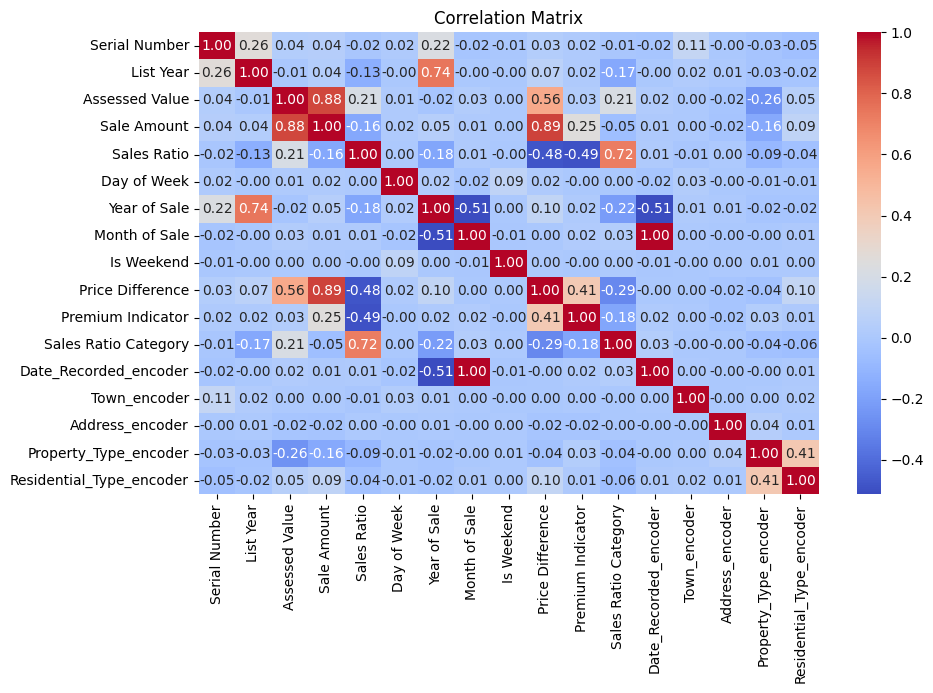

In [ ]:
data=real_state.corr()
plt.figure(figsize=(10,6))
sns.heatmap(data, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
X= real_state[['Serial Number', 'List Year',  'Assessed Value', 'Sale Amount', 'Sales Ratio', 'Day of Week', 'Year of Sale', 'Month of Sale',
       'Is Weekend', 'Price Difference', 'Premium Indicator','Sales Ratio Category', 'Date_Recorded_encoder', 'Town_encoder',
       'Address_encoder',  'Residential_Type_encoder']]
Y=real_state['Property_Type_encoder']

In [ ]:
# Importing the necessary class for feature selection
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import f_classif
import pandas as pd

# Initialize the SelectPercentile function to select features based on ANOVA F-statistic (f_classif) and 80th percentile
function_selection = SelectPercentile(score_func=f_classif, percentile=80)

# Apply the feature selection to the data (X for features, Y for target variable)
x_selection = function_selection.fit_transform(X, Y)

# Create a new DataFrame with the selected features based on the mask from the selection
selected_columns = [i for i, j in zip(X.columns, function_selection.get_support()) if j]
pd.DataFrame(x_selection, columns=selected_columns)


,Serial Number,List Year,Assessed Value,Sale Amount,Sales Ratio,Year of Sale,Month of Sale,Price Difference,Premium Indicator,Sales Ratio Category,Address_encoder,Residential_Type_encoder
0,1.688949,-0.924421,-0.350907,-0.158276,-0.590746,2021.0,9.0,0.061350,1.0,0.0,43815.0,0.0
1,-1.629845,-0.924421,0.438811,0.288601,0.223872,2020.0,10.0,0.079705,1.0,1.0,68702.0,4.0
2,0.414789,1.081759,1.029982,1.884589,-0.937918,2022.0,7.0,2.269573,1.0,0.0,84123.0,4.0
3,-0.378935,-0.924421,-0.505769,-0.775817,1.111306,2021.0,3.0,-0.856387,1.0,1.0,80085.0,1.0
4,-0.376500,-0.924421,2.188470,2.203787,0.922767,2021.0,4.0,1.716260,1.0,1.0,8748.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
122581,-1.629845,1.081759,0.516627,0.288601,0.376654,2021.0,11.0,0.005552,1.0,1.0,81980.0,4.0
122582,1.688949,1.081759,-0.895543,-0.690272,-1.006832,2022.0,9.0,-0.337388,1.0,0.0,108424.0,1.0
122583,1.688949,1.081759,-0.897238,-0.009317,-2.164072,2022.0,5.0,0.838931,1.0,0.0,95848.0,4.0
122584,0.478648,1.081759,-0.604387,-0.371075,-0.820894,2022.0,6.0,-0.064196,1.0,0.0,9620.0,4.0


In [ ]:
# The get_support() method returns a boolean mask, which is used to get the names of the selected features

function_selection.get_support()

array([ True,  True,  True,  True,  True, False,  True,  True, False,
        True,  True,  True, False, False,  True,  True])

# <span style='color:dodgerblue; font-weight:bold;'><a name="4">Classiffcation Model</a></span>

In [ ]:
X= real_state[['Serial Number', 'List Year',  'Assessed Value', 'Sale Amount', 'Sales Ratio',  'Year of Sale', 
                'Price Difference', 'Premium Indicator','Sales Ratio Category',  'Town_encoder', 'Address_encoder',  'Residential_Type_encoder']]
Y=real_state['Property_Type_encoder']



## <span style='color:dodgerblue; font-weight:bold;'><a name="4"> Train/Test dataset</a></span>
### <span style='color:dodgerblue; font-weight:bold;'><a name="4">We split our dataset into train and test set:</a></span>

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3, random_state=42)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (85810, 12) (85810,)
Test set: (36776, 12) (36776,)


In [ ]:
num_classes = len(Y.unique())
num_classes

4

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
# Ensure y_train is not one-hot encoded
y_train_labels = np.argmax(y_train, axis=1) if y_train.ndim > 1 else y_train

# Compute class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_train_labels), y=y_train_labels)
class_weight_dict = dict(enumerate(class_weights))

# Verify class_weight_dict
print("Class Weight Dict:", class_weight_dict)



Class Weight Dict: {0: 7.32917663136317, 1: 56.305774278215225, 2: 0.2733568643441474, 3: 5.331138170974155}


In [ ]:
def build_model(hp):
    model = Sequential([
        Dense(units=hp.Int('units_1', min_value=32, max_value=128, step=32), activation='relu', 
              kernel_initializer=HeNormal(), input_dim=x_train.shape[1]),
        BatchNormalization(),
        Dropout(0.3),
        
        Dense(units=hp.Int('units_2', min_value=32, max_value=128, step=32), activation='relu', 
              kernel_initializer=HeNormal()),
        BatchNormalization(),
        Dropout(0.3),
        
        Dense(num_classes, activation='softmax')  
    ])
    
    model.compile(optimizer=hp.Choice('optimizer', values=['adam', 'rmsprop']), 
                  loss='sparse_categorical_crossentropy', 
                  metrics=['accuracy'])
    
    return model

tuner = kt.Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs=10,  
    hyperband_iterations=2,  
    directory='tuner_dir',
    project_name='hyperparameter_tuning'
)

tuner.search(x_train, y_train, epochs=50, batch_size=64, validation_data=(x_test, y_test))

best_trial = tuner.oracle.get_best_trials(num_trials=1)[0]
print("Best Trial Hyperparameters:")
print(f"Optimizer: {best_trial.hyperparameters.get('optimizer')}")
print(f"Units in Layer 1: {best_trial.hyperparameters.get('units_1')}")
print(f"Units in Layer 2: {best_trial.hyperparameters.get('units_2')}")


Reloading Tuner from tuner_dir\hyperparameter_tuning\tuner0.json
Best Trial Hyperparameters:
Optimizer: rmsprop
Units in Layer 1: 32
Units in Layer 2: 32


In [ ]:
best_optimizer = best_trial.hyperparameters.get('optimizer')
best_units_1 = best_trial.hyperparameters.get('units_1')
best_units_2 = best_trial.hyperparameters.get('units_2')

### Comparison of **Weight Initialization** Methods

#### **He Initialization**:
- Ideal for use with **ReLU** and its variants, as it considers the properties of ReLU, which deactivates negative values.

#### **Glorot Initialization**:
- Useful when using **balanced activation functions** such as **Tanh** and **Sigmoid**, as it keeps the flow of values stable across layers.

#### **LeCun Initialization**:
- Suitable only when using **SELU**, as it ensures the flow of values is consistent with the properties of **SELU**.


In [ ]:
import tensorflow as tf  # Import TensorFlow for deep learning functionalities
from tensorflow.keras.models import Sequential  # Import Sequential model for stacking layers
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization  # Import layers for the neural network
from tensorflow.keras.callbacks import EarlyStopping  # Import callback to stop training early if needed
from tensorflow.keras.initializers import HeNormal  # Import He Initialization for weight initialization

# Define the model using Sequential API
model = Sequential([
    # Add the first Dense layer with 64 neurons, ReLU activation, and He Initialization for weights
    Dense(units=best_units_1, activation='relu', kernel_initializer=HeNormal()),
    # Add Batch Normalization to normalize outputs of the previous layer for stable and faster training
    BatchNormalization(),
    # Add Dropout to randomly disable 30% of neurons to reduce overfitting
    Dropout(0.3),
    
    # Add the second Dense layer with 32 neurons, ReLU activation, and He Initialization for weights
    Dense(units=best_units_2, activation='relu', kernel_initializer=HeNormal()),
    # Add Batch Normalization to normalize outputs of the second layer
    BatchNormalization(),
    # Add another Dropout layer to further reduce overfitting
    Dropout(0.3),
    
    # Add the output layer with `num_classes` neurons and Softmax activation for multi-class classification
    Dense(num_classes, activation='softmax')  
])

# Compile the model with optimization method, loss function, and evaluation metrics
model.compile(optimizer=best_optimizer,  # Use Adam optimizer for efficient weight updates
              loss='sparse_categorical_crossentropy',  # Loss function for multi-class classification
              metrics=['accuracy'])  # Metric to evaluate model performance

# Save the trained model to a file
model.save('model.h5')  # Save the model architecture, weights, and optimizer state to 'model.h5'


### Saving best weights using callbacks

In [ ]:
from keras.callbacks import ModelCheckpoint

# Define the callback to save the best model during training
checkpoint = ModelCheckpoint(
    filepath='best_multiclass_model.keras',  # Path to save the best model
    monitor='val_accuracy',                  # Metric to monitor (validation accuracy in this case)
    save_best_only=True,                     # Save only the best model (based on monitored metric)
    mode='max',                              # Mode to compare the monitored metric (maximize 'val_accuracy')
    verbose=1                                 # Display message when saving the model
)


### Training neural network model 

In [ ]:
# Training the model and storing the training history


history = model.fit(
    x_train,  # Training data (features)
    y_train,  # Training data (labels)
    epochs=50,  # Maximum number of epochs for training
    batch_size=64,  # Number of samples per training batch
    validation_data=(x_test, y_test),  # Validation data to evaluate the model during training
    verbose=1,  # Displays detailed output during training
    callbacks=[  # Adding callback functions for training control
        EarlyStopping(
            monitor='val_accuracy',  # Monitors validation accuracy to decide stopping
            patience=5,  # Stops training if validation accuracy doesn't improve for 5 epochs
            restore_best_weights=True  # Restores the best model weights after stopping
        ),
        checkpoint      # Save the best model based on validation accuracy
    ]
)


Epoch 1/50
1333/1341 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7394 - loss: 0.7804
Epoch 1: val_accuracy improved from -inf to 0.91603, saving model to best_multiclass_model.keras
1341/1341 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7402 - loss: 0.7785 - val_accuracy: 0.9160 - val_loss: 0.3549
Epoch 2/50
1340/1341 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9147 - loss: 0.3684
Epoch 2: val_accuracy did not improve from 0.91603
1341/1341 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9147 - loss: 0.3684 - val_accuracy: 0.9160 - val_loss: 0.3509
Epoch 3/50
1326/1341 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9155 - loss: 0.3566
Epoch 3: val_accuracy improved from 0.91603 to 0.91614, saving model to best_multiclass_model.keras
1341/1341 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9155 - loss: 0.3566 - val_accuracy: 0.9161 - val_loss: 0.3517
Epoch 4/50
1339/1341 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9145 - loss: 0.3575
Epoch 4: val_accuracy improved from 0.91614

### Evaluation Of The Model

In [ ]:
model.evaluate(x_test, y_test)


1150/1150 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9151 - loss: 0.3561


[0.35243886709213257, 0.9163312911987305]

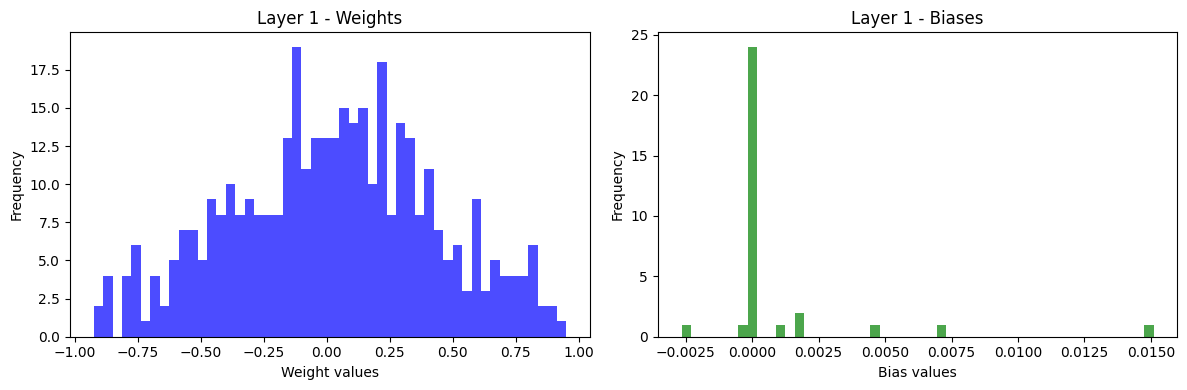

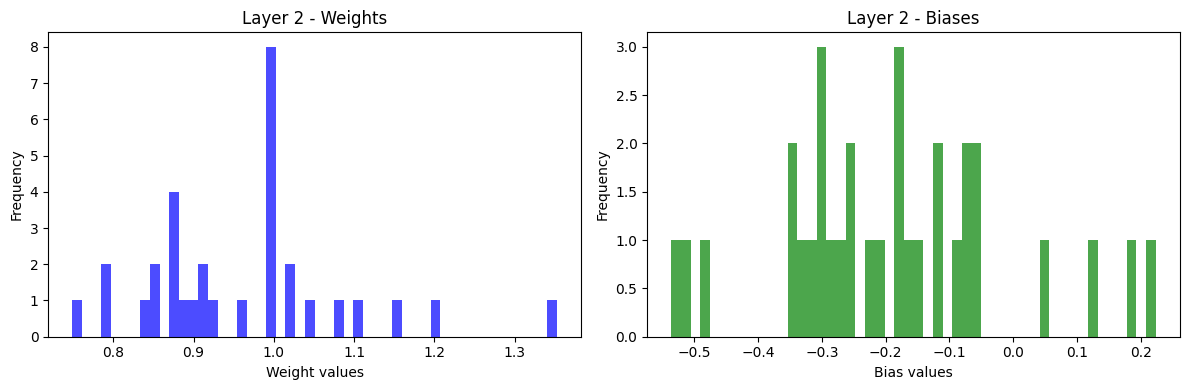

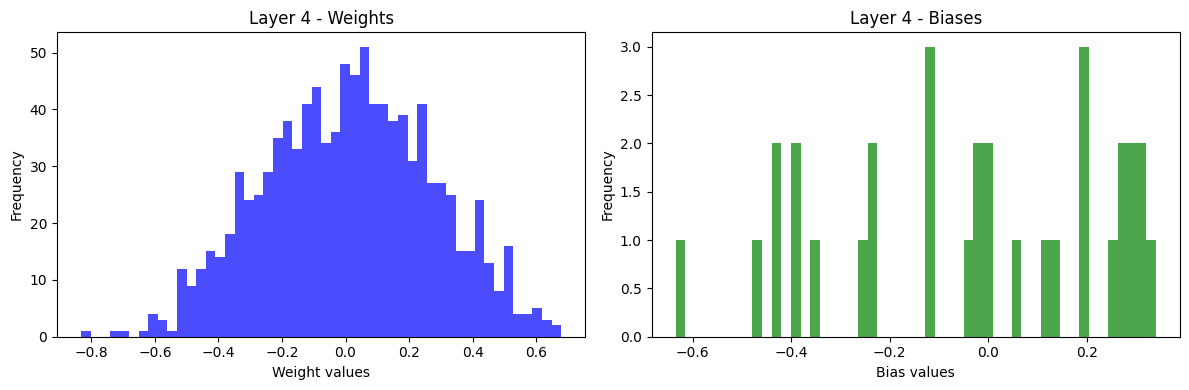

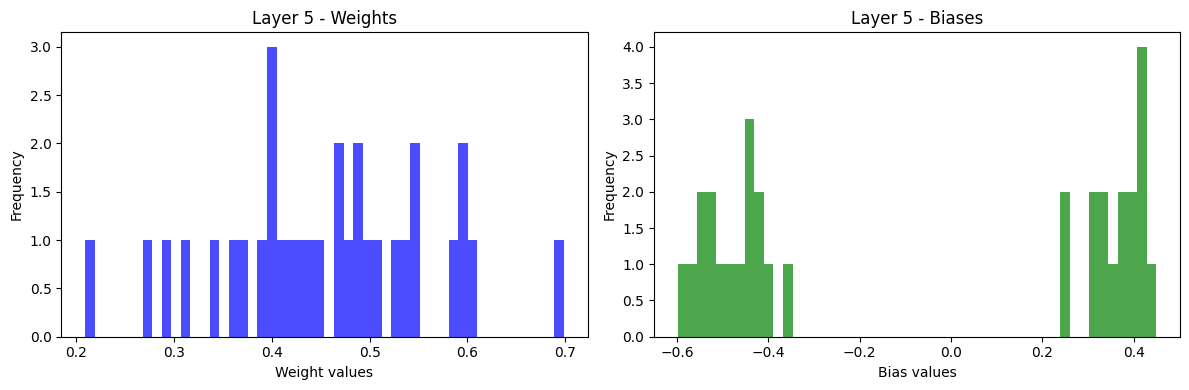

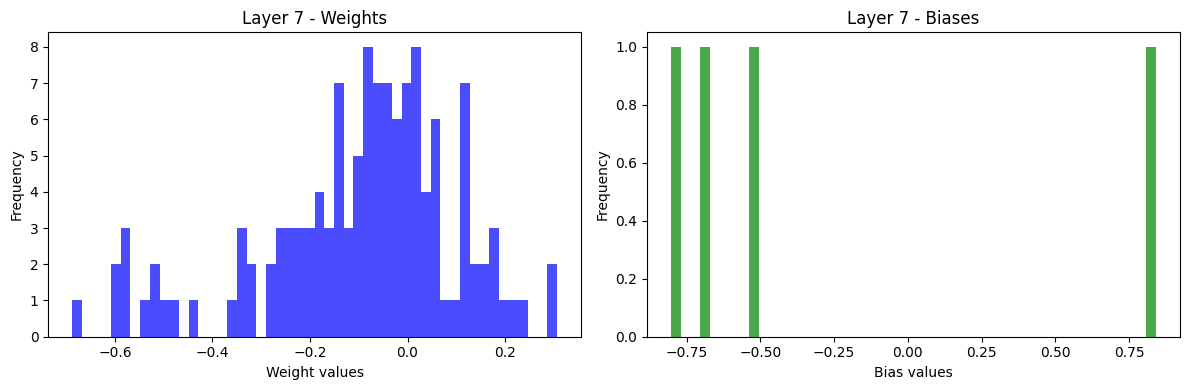

In [ ]:
import matplotlib.pyplot as plt

def plot_weights_and_biases(model):
    for i, layer in enumerate(model.layers):
        weights_and_biases = layer.get_weights()
        
        # Ensure there are at least weights and biases
        if len(weights_and_biases) >= 2:
            weights, biases = weights_and_biases[:2]  # Only take the first two
        else:
            continue  # Skip layers without weights and biases

        # Create a figure with 2 subplots (side-by-side)
        plt.figure(figsize=(12, 4))

        # Plot weights
        plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st plot
        plt.hist(weights.flatten(), bins=50, color='blue', alpha=0.7)
        plt.title(f"Layer {i+1} - Weights")
        plt.xlabel("Weight values")
        plt.ylabel("Frequency")

        # Plot biases
        plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd plot
        plt.hist(biases.flatten(), bins=50, color='green', alpha=0.7)
        plt.title(f"Layer {i+1} - Biases")
        plt.xlabel("Bias values")
        plt.ylabel("Frequency")

        # Display the combined plots
        plt.tight_layout()
        plt.show()

# Call the function to visualize weights and biases side-by-side
plot_weights_and_biases(model)


    - **Layer (type)**: The name and type of each layer in the model.
    - **Output Shape**: The shape of the output produced by each layer.
    - **Param #**: The number of trainable parameters in each layer.
    - **Total params**: The total number of parameters in the model.
    - **Trainable params**: The number of parameters that will be updated during training.
    - **Non-trainable params**: Parameters that are fixed (e.g., in batch normalization layers).


In [ ]:
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 32)             │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,594 (14.04 KB)

 Trainable params: 1,732 (6.77 KB)

 Non-trainable params: 128 (512.00 B)

 Optimizer params: 1,734 (6.78 KB)

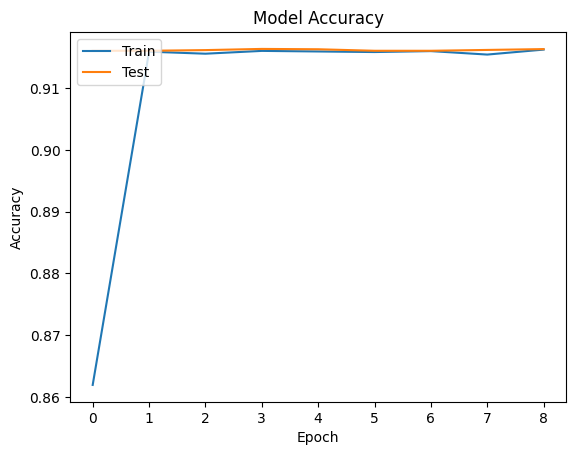

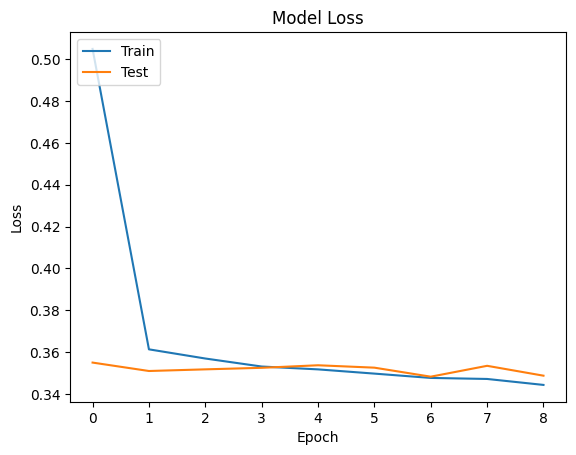

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])  # Plot training accuracy over epochs
plt.plot(history.history['val_accuracy'])  # Plot validation accuracy over epochs
plt.title('Model Accuracy')  # Title of the accuracy plot
plt.xlabel('Epoch')  # Label for the x-axis (epochs)
plt.ylabel('Accuracy')  # Label for the y-axis (accuracy)
plt.legend(['Train', 'Test'], loc='upper left')  # Legend to differentiate between training and validation
plt.show()  # Display the accuracy plot

# Plot training & validation loss values
plt.plot(history.history['loss'])  # Plot training loss over epochs
plt.plot(history.history['val_loss'])  # Plot validation loss over epochs
plt.title('Model Loss')  # Title of the loss plot
plt.xlabel('Epoch')  # Label for the x-axis (epochs)
plt.ylabel('Loss')  # Label for the y-axis (loss)
plt.legend(['Train', 'Test'], loc='upper left')  # Legend to differentiate between training and validation
plt.show()  # Display the loss plot


In [ ]:
# Predicting the output for the training data using the trained model
predictions_train = model.predict(x_train)  # Get predicted probabilities for each class

# Converting the predicted probabilities to class labels by taking the index with the highest probability
predicted_classe = np.argmax(predictions_train, axis=1)  # Convert predictions to class labels

# Printing the predicted class labels
print(predicted_classe)  # Display the predicted class labels for the training set


2682/2682 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
[2 2 2 ... 2 2 2]



## <span style='color:dodgerblue; font-weight:bold;'><a name="4"> Important  Features</a></span>


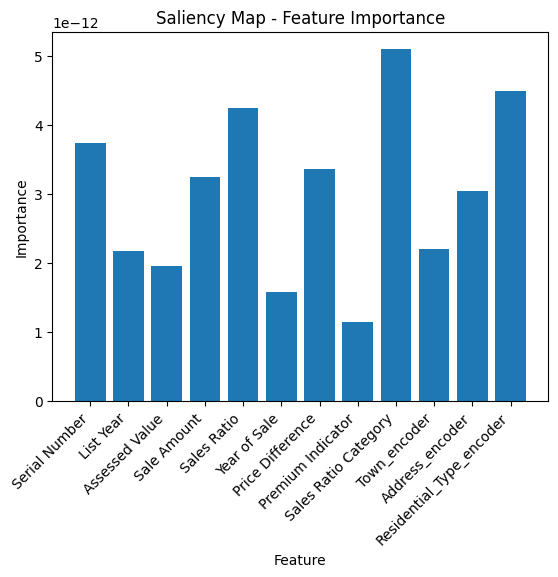

In [ ]:
# Importing required libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Converting the test data (x_test) to a TensorFlow tensor for compatibility with TensorFlow operations
x_test_tensor = tf.convert_to_tensor(x_test, dtype=tf.float32)

# Creating a GradientTape context to record the operations for automatic differentiation
with tf.GradientTape() as tape:
    tape.watch(x_test_tensor)  # Watching the input tensor to compute the gradient with respect to it
    predictions = model(x_test_tensor)  # Making predictions with the trained model

# Computing the gradients of the predictions with respect to the input features (x_test_tensor)
gradients = tape.gradient(predictions, x_test_tensor)

# Taking the absolute value of the gradients to measure feature importance (larger gradients mean higher importance)
gradients_abs = np.abs(gradients.numpy())

# Calculating the mean of the absolute gradients across all instances in the test set to get the overall feature importance
importance = gradients_abs.mean(axis=0)

# If x_test is a DataFrame, get the feature names, otherwise just use index range
feature_names = x_test.columns if hasattr(x_test, 'columns') else range(len(importance))

# Plotting a bar chart to visualize the feature importance (saliency map)
plt.bar(feature_names, importance)
plt.xlabel('Feature')  # Label for the x-axis
plt.ylabel('Importance')  # Label for the y-axis
plt.title('Saliency Map - Feature Importance')  # Title for the plot
plt.xticks(rotation=45, ha='right')  # Rotate feature labels for better readability
plt.show()


## <span style='color:dodgerblue; font-weight:bold;'><a name="4">Make Prediction Unseen Example</a></span>


In [ ]:
# Importing the necessary function to load the trained model from a file
from tensorflow.keras.models import load_model

# Loading the trained model (saved as 'model.h5') from the file
model = load_model('model.h5')

# Loading the scaler (used to scale the features during training) from the saved file
scaler = joblib.load('scaler.pkl')

# Loading the label encoder (used to encode categorical labels during training) from the saved file
encoder = joblib.load('encoder.pkl')


In [ ]:
X=pd.read_csv('sample_real_estate_data.csv')

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Serial Number         15 non-null     int64  
 1   List Year             15 non-null     int64  
 2   Assessed Value        15 non-null     int64  
 3   Sale Amount           15 non-null     int64  
 4   Sales Ratio           15 non-null     float64
 5   Year of Sale          15 non-null     int64  
 6   Price Difference      15 non-null     int64  
 7   Premium Indicator     15 non-null     object 
 8   Sales Ratio Category  15 non-null     object 
 9   Town                  15 non-null     object 
 10  Address               15 non-null     object 
 11  Residential Type      15 non-null     object 
dtypes: float64(1), int64(6), object(5)
memory usage: 1.5+ KB


In [ ]:
X

,Serial Number,List Year,Assessed Value,Sale Amount,Sales Ratio,Year of Sale,Price Difference,Premium Indicator,Sales Ratio Category,Town,Address,Residential Type
0,1001,2023,350000,400000,1.14,2023,50000,Yes,Above Average,Town A,123 Maple St,Single Family
1,1002,2022,300000,280000,0.93,2022,-20000,No,Below Average,Town B,456 Oak St,Apartment
2,1003,2023,400000,450000,1.13,2023,50000,Yes,Above Average,Town C,789 Pine St,Townhouse
3,1004,2021,250000,260000,1.04,2021,10000,No,Average,Town D,101 Elm St,Condo
4,1005,2020,450000,470000,1.04,2020,20000,Yes,Average,Town E,202 Cedar St,Single Family
5,1006,2022,320000,340000,1.06,2022,20000,No,Average,Town F,303 Birch St,Apartment
6,1007,2023,380000,390000,1.03,2023,10000,No,Average,Town G,404 Spruce St,Condo
7,1008,2023,370000,380000,1.03,2023,10000,Yes,Above Average,Town H,505 Aspen St,Townhouse
8,1009,2021,270000,280000,1.04,2021,10000,No,Average,Town I,606 Willow St,Apartment
9,1010,2020,290000,300000,1.03,2020,10000,No,Average,Town J,707 Redwood St,Single Family


In [ ]:
print(X.columns)


Index(['Serial Number', 'List Year', 'Assessed Value', 'Sale Amount',
       'Sales Ratio', 'Year of Sale', 'Price Difference', 'Premium Indicator',
       'Sales Ratio Category', 'Town', 'Address', 'Residential Type'],
      dtype='object')


In [ ]:
# Assuming scaler and encoder are compatible with input features
# Scale numerical features
x_data=X[['Serial Number','List Year', 'Assessed Value', 'Sale Amount','Sales Ratio', 'Price Difference']]
X_scaled = scaler.transform(x_data)


print("Preprocessed input features:",X_scaled)

Preprocessed input features: [[-16.02648558   5.094117     1.18615373   0.16092164   3.81066488
   -0.8527163 ]
 [-16.02640703   3.08793775   0.80092542  -0.34979468   2.44538228
   -1.36664922]
 [-16.02632848   5.094117     1.57138204   0.3737201    3.74565142
   -0.8527163 ]
 [-16.02624994   1.08175851   0.41569712  -0.43491406   3.16053031
   -1.14639225]
 [-16.02617139  -0.92442074   1.95661035   0.45883948   3.16053031
   -1.07297326]
 [-16.02609284   3.08793775   0.95501675  -0.09443652   3.29055722
   -1.07297326]
 [-16.02601429   5.094117     1.41729072   0.11836194   3.09551685
   -1.14639225]
 [-16.02593575   5.094117     1.34024506   0.07580225   3.09551685
   -1.14639225]
 [-16.0258572    1.08175851   0.56978844  -0.34979468   3.16053031
   -1.14639225]
 [-16.02577865  -0.92442074   0.72387976  -0.26467529   3.09551685
   -1.14639225]
 [-16.0257001    5.094117     1.6484277    0.24604102   3.0305034
   -1.14639225]
 [-16.02562156   3.08793775   1.03206241  -0.09443652   3.0

In [ ]:
# Make predictions
prediction = model.predict(X_scaled)
predicted_classe = np.argmax(prediction, axis=1)

print("Prediction:",predicted_classe)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 508ms/step
Prediction: [3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
